## 데이터4 카테고리 기반 문제 유형
<img src="./category_1.png" width="600">

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import pandas as pd
import numpy as np
import json
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from PIL import Image, ImageDraw
import cv2
import random

import matplotlib
import matplotlib.pyplot as plt

is correct? : True


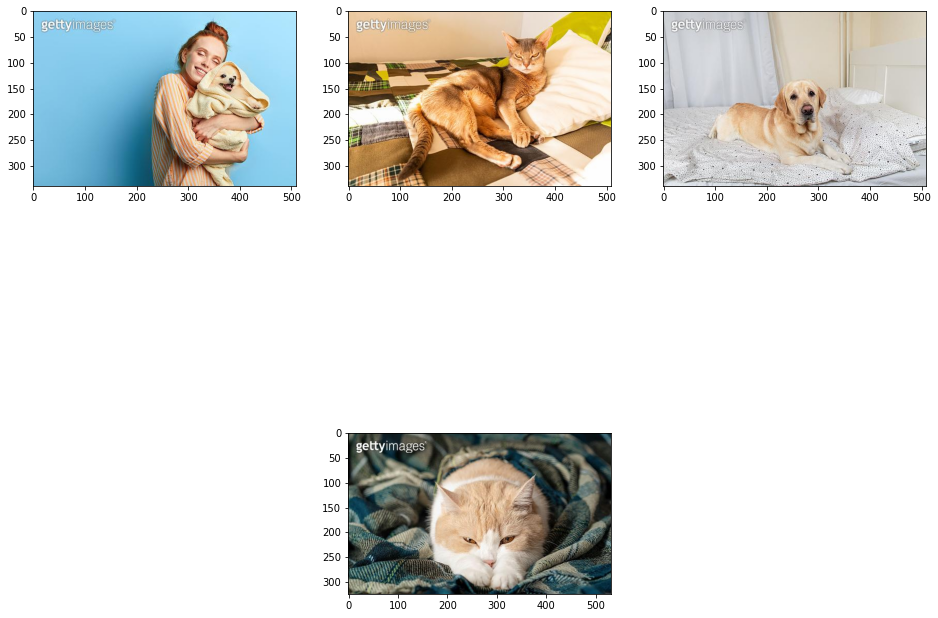

In [3]:
import os
os.chdir(f'/home/ktlim/Visual_Reasoning/task4/')
folder_name = os.listdir("./category_data/category_1/")[3]
os.chdir(f'/home/ktlim/Visual_Reasoning/task4/category_data/category_1/{folder_name}')

file_list = os.listdir(f"./")
for file_name in file_list:
    if file_name.endswith('.json'):
        json_file = file_name
        file_list.remove(file_name)
"""
print(f'jpg_list : {file_list}')
print(f'json_file : {json_file}')
"""

a_data = json.load(open(f'./{json_file}'))
answer = a_data['Answers'][0]['images'][0]['image_url']

file_list.remove(answer)

print(f"is correct? : {a_data['is_correct']}")

plt.figure(figsize=(16, 14))

for i in range(len(file_list)):
    question_img = Image.open(f'./{file_list[i]}')
    plt.subplot(2, len(file_list), i+1)
    plt.imshow(question_img)

#plot answer image
answer_img = Image.open(f'./{answer}')
plt.subplot(2, len(file_list), int(len(file_list)*3/2)+1)
plt.imshow(answer_img)
plt.show()

In [4]:
os.chdir(f'/home/mjkim/VR/')
print(f'Total #Data : {len(os.listdir("./category_data/category_1/"))}')

Total #Data : 14185


In [5]:
!pwd

/home/mjkim/VR


In [6]:
# Dataset에서 200249 폴더 오류

# import shutil
# shutil.rmtree(f'./category_data/category_1/200249')

In [7]:
os.chdir(f'/home/ktlim/Visual_Reasoning/task4/')
folder_name = sorted(os.listdir("./category_data/category_1/"))

question_img_1 = []
question_img_2 = []
question_img_3 = []
answer_img_arr = []
label = []

try_count = 0
except_count = 0



for elements in folder_name:
    file_list = os.listdir(f"./category_data/category_1/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./category_data/category_1/{elements}/{json_file}'))
    
    try:
        answer = a_data['Answers'][0]['images'][0]['image_url']
        file_list.remove(answer)
        label.append(a_data['is_correct'])
        question_img_1.append(file_list[0])
        question_img_2.append(file_list[1])
        question_img_3.append(file_list[2])

        answer_img_arr.append(answer)
        try_count += 1
    except:
        print(f'Error : {elements}')
        folder_name.remove(elements)
        except_count += 1



In [8]:
len(folder_name)

14185

In [9]:
print(try_count, except_count)

14185 0


In [10]:
print(len(question_img_1))
print(len(question_img_2))
print(len(question_img_3))
print(len(folder_name))
print(len(answer_img_arr))


14185
14185
14185
14185
14185


In [11]:
df = pd.DataFrame(zip(folder_name, question_img_1,question_img_2, question_img_3, answer_img_arr, label), columns=['folder_name', 'img_1', 'img_2', 'img_3', 'answer_img', 'label'])
df

,folder_name,img_1,img_2,img_3,answer_img,label
0,006003,522a2cc893b145b7b7cb40d06fea7ae2.jpg,75e64f340b7842fd84c8fbf2a2daabd2.jpg,0c9eaa776f6947a997ebaa24e0e2757f.jpg,2470e4e98020490e82df557b2cef3cfb.jpg,False
1,006005,c6ddd938c0d24475ba9c2cf36073469f.jpg,bab443cfdcc34282b8ec3208b9e5fe40.jpg,2e53578d5c78448db8c5bbac2ffbacd2.jpg,f6670122d87e4d1ba3ee9ecb773f615c.jpg,False
2,006011,b71eb86041594cd6b97776d64ca2884c.jpg,461b71553a64449faabd1a0cc88cc115.jpg,bcc661e30e454b878ec53577fd57a692.jpg,5a8676d4cb5e449dbcf1f938f8d6d2cf.jpg,False
3,006012,ac6f0c66a604491e976035b3949efbbb.jpg,bbe9a0bd96a44ac3abe172483ef14289.jpg,2cdf7ecdd5d74a869e29dcdd9bf7ff1c.jpg,f51cdebbf4664226b57747cbd1519a8e.jpg,True
4,006013,c97cfe6bb53f42ddbcc5e28e035d879d.jpg,c6dd72e0ebca431792bb4e93dd131826.jpg,a25d67c834f341b79573bb44848a6a94.jpg,02f03575d0a240848aa5173dbe5dd603.jpg,False
...,...,...,...,...,...,...
14180,252889,c0b44773153a441e882b140d16fba72b.jpg,418280ae861947c09448fcbc339e33ac.jpg,8f7d43a8bbe14f8ea3a220b577d981f7.jpg,625e80522f32495c93068ca4d8d36a4b.jpg,False
14181,252893,3503dde2f2414c9ea4d5a5be43d7c53a.jpg,a34357a757d041809509390e8c95ba31.jpg,da80674462d64766abfac4de49d104a8.jpg,26f2152680c844eda768a84c290ce446.jpg,True
14182,252896,07540a9bfa6047be90511c6b2b783259.jpg,0a1c52b22b1e4d1da24da72c066cd015.jpg,10a1fa5ab5f94f63ba76c7ce5865df31.jpg,1b1103f1b9ae4f57bdc00de90318db56.jpg,True
14183,252946,c3ca7a36c35d49f2ba56d19e9ee60258.jpg,fb1fb6c885ac47bd93f8bb792473fa10.jpg,d1505029710e43bba67d99114f1061ec.jpg,4b23d1e33826419a95a1cfd4de2f58e2.jpg,False


In [12]:
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.RandomCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [13]:
class Category1_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, config=None, transform=None):
        self.df = df
        self.config = config
        self.transform = transform
        
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        
        folder = sample[0]+'/'

        img_1_path = './category_data/category_1/'+folder+sample[1]
        img_2_path = './category_data/category_1/'+folder+sample[2]
        img_3_path = './category_data/category_1/'+folder+sample[3]

        ans_img_path = './category_data/category_1/'+folder+sample[4]
        label = sample[5]

        
        img_1_feature = Image.open(img_1_path).convert('RGB')
        img_2_feature = Image.open(img_2_path).convert('RGB') 
        img_3_feature = Image.open(img_3_path).convert('RGB')  
        img_ans_feature = Image.open(ans_img_path).convert('RGB')
        
        img_1_feature = self.transform(img_1_feature)  
        img_2_feature = self.transform(img_2_feature)  
        img_3_feature = self.transform(img_3_feature)  
        img_ans_feature = self.transform(img_ans_feature)        
        
        return {
            "label": label,
            "img_1": img_1_feature,
            "img_2": img_2_feature,
            "img_3": img_3_feature,
            "answer": img_ans_feature
        }
        
    

In [14]:
def make_sequential(in_channels, out_channels, *args, **kwargs):
    return nn.Sequential(nn.Conv2d(in_channels, out_channels, *args, **kwargs),
           nn.BatchNorm2d(out_channels),
           nn.ReLu(),
           nn.MaxPool2d(*args, **kwargs))

class VRCategory(nn.Module):
    def __init__(self, config):
        super(VRCategory, self).__init__()
        
        self.config = config
        self.backborne = torchvision.models.resnet50(pretrained=True)
        self.backborne.fc = nn.Linear(self.backborne.fc.in_features, self.config.input_dim)
        self.fc = nn.Sequential(
                    nn.Linear(self.config.input_dim*4, self.config.mlp_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(self.config.mlp_hidden, 2), 
        )

    def forward(self, samples):
        
        #Question Image Feature
        q_img1 = self.backborne(samples["img_1"])
        q_img2 = self.backborne(samples["img_2"])
        q_img3 = self.backborne(samples["img_3"])

        
        #Answer1 Image Feature
        a_img = self.backborne(samples["answer"])

        
        
        q_a1 = torch.cat([q_img1, q_img2, q_img3, a_img], axis=1)
        
        q_a1_logit = self.fc(q_a1)
        
        return {
            "q_a1_logit": F.log_softmax(q_a1_logit, dim=1),
        }


In [15]:
def train_fn(model, train_loader, optimizer, loss_fn, config):
    
    total_count_correct = 0
    total_num_example = 0
    total_loss = []
    
    model.train()
    device = "cuda"
    
    for batch in tqdm(train_loader):          
        
        #Question Image Feature
        batch["img_1"] = batch["img_1"].to(device)
        batch["img_2"] = batch["img_2"].to(device)
        batch["img_3"] = batch["img_3"].to(device)

        
        #Answer Image Feature
        batch["answer"] = batch["answer"].to(device)

        #Label : True or False
        batch["label"] = batch["label"].to(device)
        
        logits = model(batch)

        target = batch["label"].long().to(device)
        loss = loss_fn(logits["q_a1_logit"].squeeze(), target)
        
        total_loss.append(loss.item())
        
        predicted = logits["q_a1_logit"].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct = total_count_correct + torch.sum(predicted == target).item()
        total_num_example = total_num_example + target.size(0)



        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("TRAIN_LOSS:", str(sum(total_loss)/total_num_example) + " TRAIN_Accuracy: " + str(total_count_correct/total_num_example) )
    return sum(total_loss)/total_num_example, total_count_correct/total_num_example


In [16]:
def valid_fn(model, valid_loader, config):
    
    total_count_correct = 0
    total_num_example = 0
    device = "cuda"
    total_loss = []
    
    model.eval()
    with torch.no_grad():
        for batch in tqdm(valid_loader):          
            
            #Question Image Feature
            batch["img_1"] = batch["img_1"].to(device)
            batch["img_2"] = batch["img_2"].to(device)
            batch["img_3"] = batch["img_3"].to(device)

            #Answer Image Feature    
            batch["answer"] = batch["answer"].to(device)

            #Label : True or False
            batch["label"] = batch["label"].to(device)

            logits = model(batch)
            target = batch["label"].long().to(device)
            
            loss = loss_fn(logits["q_a1_logit"].squeeze(), target)
            total_loss.append(loss.item())
        
            predicted_a1 = logits["q_a1_logit"].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct = total_count_correct + torch.sum(predicted_a1 == target).item()
            total_num_example = total_num_example + target.size(0)

        print("Valid Accuracy: " + str(total_count_correct/total_num_example))
    return sum(total_loss)/total_num_example, total_count_correct/total_num_example


In [17]:
class Config:
    def __init__(self, args=None):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.distributed = False
        self.gpu_id = "0,1"
        self.input_dim = 512
        self.mlp_hidden = 1024
        self.n_epoch = 8

config = Config()

In [18]:
train_df, valid_df = train_test_split(df)

train_datasets = Category1_Dataset(train_df, transform=transform)
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=128,  num_workers=32)

valid_datasets = Category1_Dataset(valid_df, transform=transform)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=128,  num_workers=32)

model = VRCategory(config)
#vrs1_model = torch.nn.DataParallel(vrs1_model)
model = model.to(config.device)
if config.distributed:
    #vrs1_model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[config.gpu])    
    model = torch.nn.parallel.DistributedDataParallel(model)    

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.NLLLoss(reduction="sum")


In [19]:
train_loss_list = []
train_acc_list = []

vali_loss_list = []
vali_acc_list = []


for epoch in range(config.n_epoch):
    train_loss, train_acc = train_fn(model, train_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, config=config)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    
    vali_loss, vali_acc = valid_fn(model, valid_loader=valid_loader, config=config)
    vali_loss_list.append(vali_loss)
    vali_acc_list.append(vali_acc)
torch.save(model.state_dict(), '/home/ktlim/Visual_Reasoning/task4/train_category1.pt')

100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.27877980290240956 TRAIN_Accuracy: 0.8752585072382026


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


Valid Accuracy: 0.8424020298844094


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.11541430078815262 TRAIN_Accuracy: 0.9559127655574357


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8638285875387651


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.06918108716962884 TRAIN_Accuracy: 0.9742432788118067


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8638285875387651


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.045979669605807086 TRAIN_Accuracy: 0.9824215078022185


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8660840146602763


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.03919601233118928 TRAIN_Accuracy: 0.985993607821019


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.869467155342543


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.030101265880141094 TRAIN_Accuracy: 0.9896597104718932


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8751057231463208


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.02902743595554755 TRAIN_Accuracy: 0.9903177288964091


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


Valid Accuracy: 0.8937129968987877


100%|██████████| 84/84 [01:47<00:00,  1.28s/it]


TRAIN_LOSS: 0.020713134904268272 TRAIN_Accuracy: 0.9921977815378831


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8838455032421765


epochs [0, 1, 2, 3, 4, 5, 6, 7]
loss_list 8


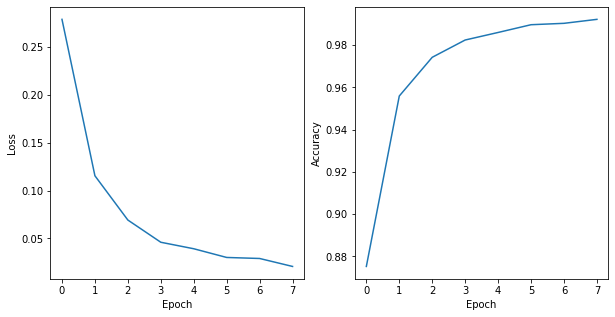

In [20]:
epochs = list(range(len(train_loss_list)))
print("epochs", epochs)
print("loss_list", len(train_loss_list))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epochs,train_loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epochs, train_acc_list)
plt.show()

In [21]:
loss_list = []
acc_list = []
for epoch in range(config.n_epoch):
    loss, acc = valid_fn(model, valid_loader=valid_loader, config=config)
    loss_list.append(loss)
    acc_list.append(acc)

100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


Valid Accuracy: 0.8832816464617987


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8841274316323654


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


Valid Accuracy: 0.8846912884127431


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


Valid Accuracy: 0.8858190019734987


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8855370735833098


100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


Valid Accuracy: 0.8858190019734987


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


Valid Accuracy: 0.8863828587538766


100%|██████████| 28/28 [00:17<00:00,  1.56it/s]

Valid Accuracy: 0.8846912884127431


epochs [0, 1, 2, 3, 4, 5, 6, 7]
loss_list 8


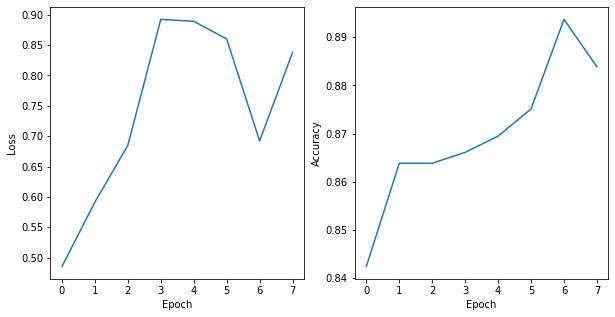

In [22]:
epochs = list(range(len(vali_loss_list)))
print("epochs", epochs)
print("loss_list", len(vali_loss_list))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epochs,vali_loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epochs, vali_acc_list)
plt.show()